In [236]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from numpy import random
import pandas as pd
import sklearn.preprocessing as pre
from sklearn.datasets import make_regression
import seaborn as sns
from scipy import stats

In [275]:
np.random.seed(42)

outliers_proportion = np.linspace(0.001,0.03,10)
outliers_magnitude  = np.linspace(1,30,10)

n_samples = 1000

Data = make_regression(n_samples= 1000, n_features=10, n_informative=10, noise=5)

M = LinearRegression()

score_list_e = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
score_list   = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
coefs_var    = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
coefs_mean   = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)
loss         = np.zeros(len(outliers_proportion) * len(outliers_magnitude)).reshape(10,10)

i = 0

for magn in outliers_magnitude:
    
    j = 0
    for prop in outliers_proportion:
        X = Data[0]
        y = Data[1].reshape(-1,1)
        n_outliers = int(prop * n_samples)

        outliers_index = random.choice(n_samples, n_outliers, replace=False)
        X[outliers_index] = X[outliers_index] * magn

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

        M.fit(X_train, y_train)
        
        scr = M.score(X_test, y_test)
        
        coefs_var[i][j]  = np.around(np.var(M.coef_), decimals=3)
        coefs_mean[i][j] = np.around(np.mean(M.coef_), decimals=3)
        
        score_list_e[i][j] = np.around(np.e**(scr), decimals=3)
        score_list[i][j] = np.around(scr, decimals=3)
        loss[i][j] = np.around(np.e**(1-scr), decimals=3)
        
        
#         print('Number of outliers:{}, Magnitude of outliers:{} is   '.format(prop,magn),M.score(X_test, y_test))
        j += 1
    i += 1
    
    

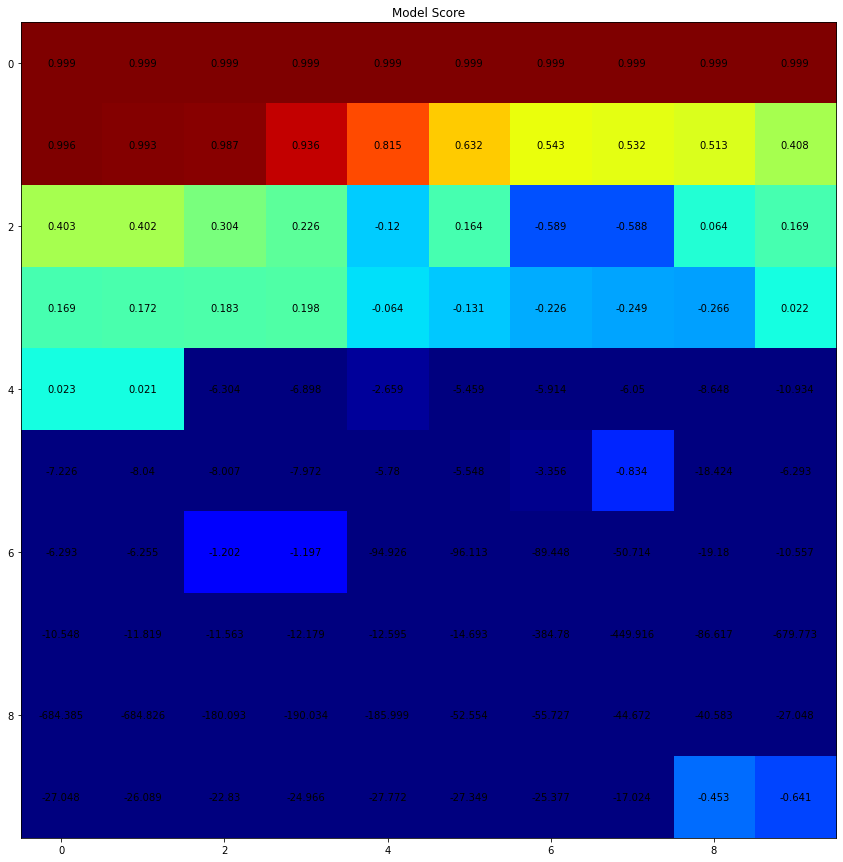

In [276]:

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(score_list_e, cmap=plt.cm.jet,)
ax.set_title('Model Score')

for (i, j), z in np.ndenumerate(score_list):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

plt.show()

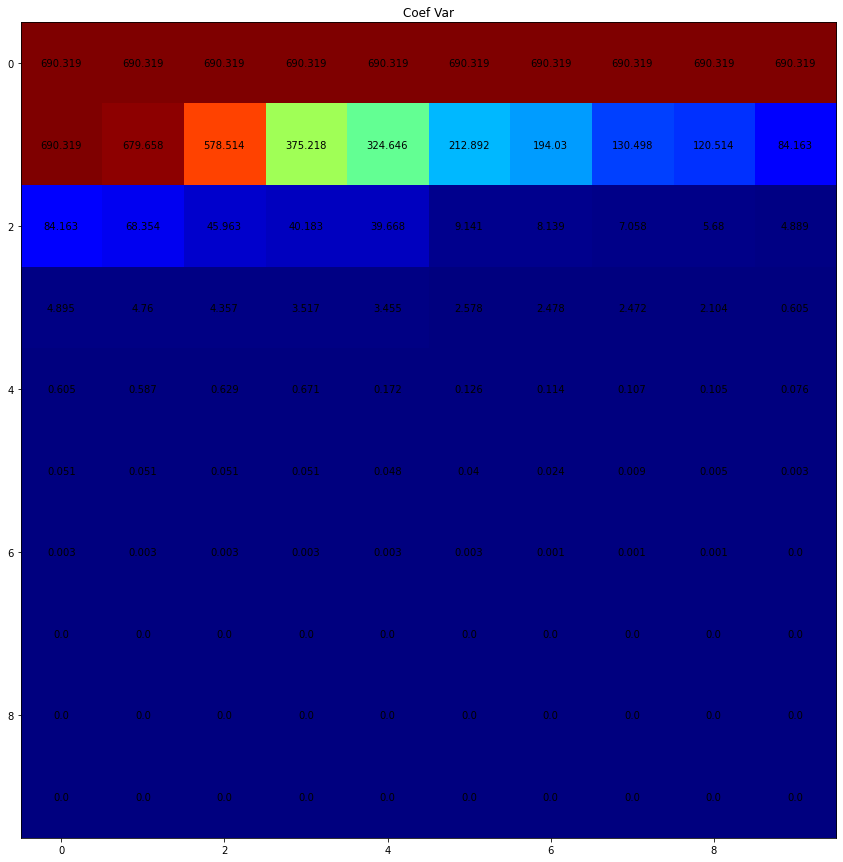

In [277]:

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(coefs_var, cmap=plt.cm.jet,)
ax.set_title('Coef Var')

for (i, j), z in np.ndenumerate(coefs_var):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

plt.show()

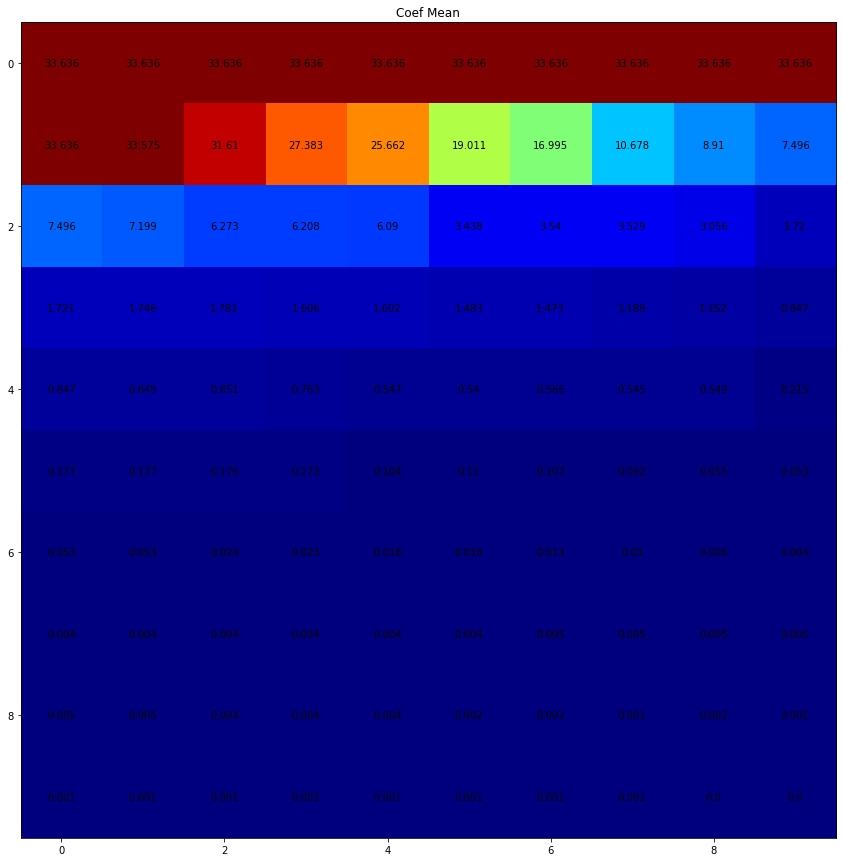

In [278]:

fig, ax = plt.subplots()

fig.set_figheight(15)
fig.set_figwidth(15)
ax.imshow(coefs_mean, cmap=plt.cm.jet,)
ax.set_title('Coef Mean')

for (i, j), z in np.ndenumerate(coefs_mean):
    ax.text(j, i, '{}'.format(z), ha='center', va='center')

plt.show()

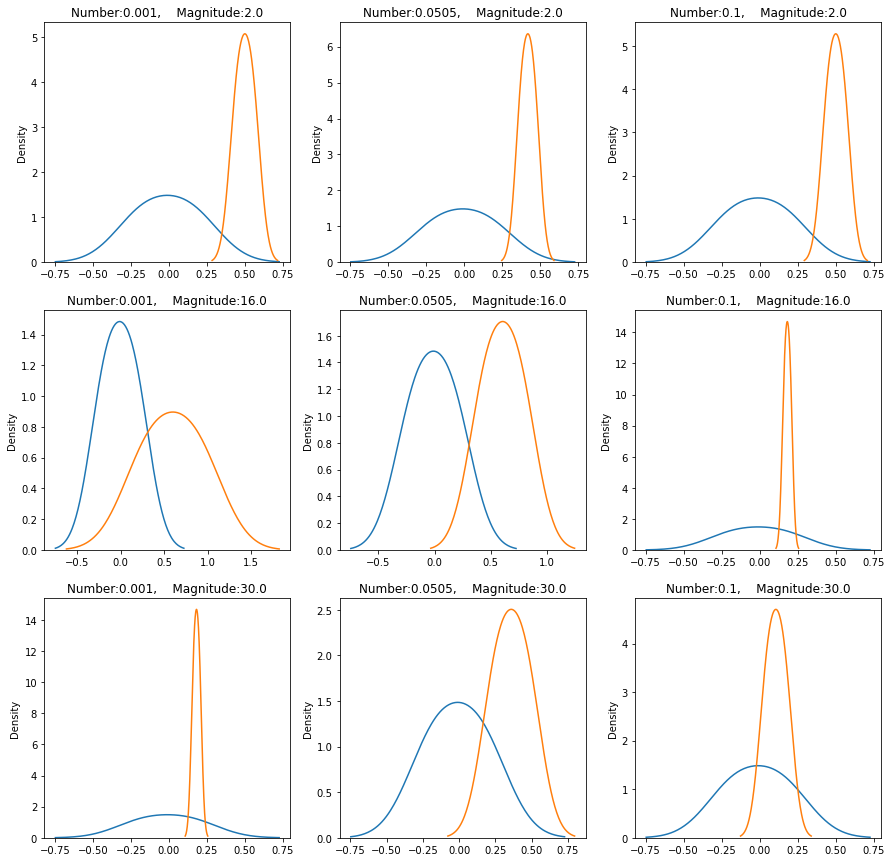

In [301]:
np.random.seed(42)

outliers_proportion = np.linspace(0.001,0.1,3)
outliers_magnitude  = np.linspace(2,30,3)
n_samples = 1000

Data = make_regression(n_samples= 1000, n_features=2, n_informative=2, noise=5)

fig, axes = plt.subplots(3, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
i = 0
for magn in outliers_magnitude:
    
    j = 0
    for prop in outliers_proportion:
        
        
        X = Data[0]
        y = Data[1].reshape(-1,1)
        n_outliers = int(prop * n_samples)

        outliers_index = random.choice(n_samples, n_outliers, replace=False, )
        X[outliers_index] = X[outliers_index] * magn
        
        sns.kdeplot(X[0],ax = axes[i][j])
        cov_list.append([np.mean(X[0]),np.var(X[0])])
        

        S = pre.MinMaxScaler()
        transformed = S.fit_transform(X)

        axes[i][j].set(title = 'Number:{},    Magnitude:{}'.format(prop,magn))
        sns.kdeplot(transformed[0],ax = axes[i][j])     

        j += 1
    i += 1
    
    

In [340]:
from scipy.stats import zscore
np.random.seed(42)

prop = 0.03
magn  = 10
n_samples = 1000

Data = make_regression(n_samples= 1000, n_features=2, n_informative=2, noise=5)\

X = Data[0]
y = Data[1].reshape(-1,1)
n_outliers = int(prop * n_samples)
X_df = pd.DataFrame(data = np.hstack((X,y)))
X_df.columns = ['c1','c2','y']
z_score_bn = np.abs(stats.zscore(X_df))
outliers_index = random.choice(n_samples, n_outliers, replace=False, )
X[outliers_index] = X[outliers_index] * magn

S = pre.MinMaxScaler()
transformed = S.fit_transform(X)
tr_df = pd.DataFrame(data = np.hstack((transformed,y)))
tr_df.columns = ['c1','c2','y']
z_score_an = np.abs(stats.zscore(tr_df))

<AxesSubplot:xlabel='c2', ylabel='Density'>

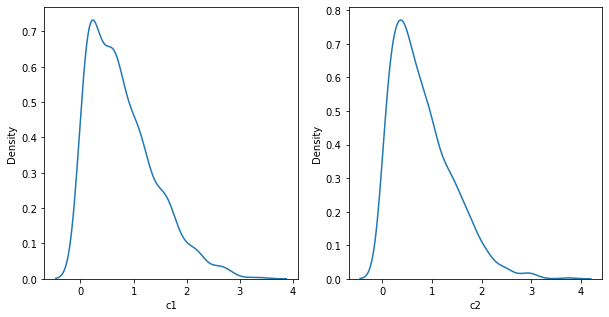

In [341]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.kdeplot(z_score_bn.c1,ax = axes[0])
sns.kdeplot(z_score_bn.c2,ax = axes[1])

<AxesSubplot:xlabel='c2', ylabel='Density'>

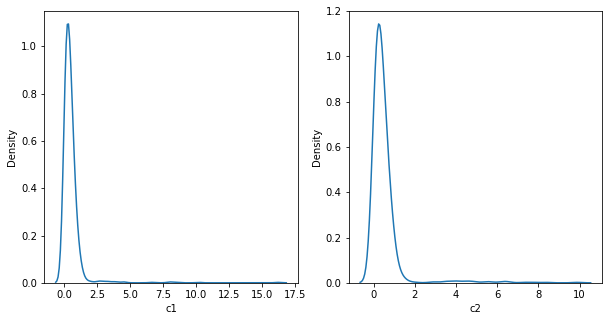

In [342]:
fig, axes = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.kdeplot(z_score_an.c1,ax = axes[0])
sns.kdeplot(z_score_an.c2,ax = axes[1])

In [370]:
indices = outliers_index.reshape(1,-1)
indices.sort()
indices_set = set(indices[0])

In [372]:
c1_indices = set(tr_df[z_score_an.c1 > 1.5].index)
c2_indices = set(tr_df[z_score_an.c2 > 1.8].index)
joint_set  = c1_indices.union(c2_indices)
print(joint_set.difference(indices_set))
print(indices_set.difference(joint_set))

{434}
{468}
